<a href="https://colab.research.google.com/github/MostafaEldakamawy/machine-learning/blob/main/calories_burnt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [25]:
# loading the data to a pandas dataframe
calories = pd.read_csv('/content/calories.csv')

In [26]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [27]:
# loading data to a pandas dataframe
exercise_data = pd.read_csv('/content/exercise.csv')

In [28]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


combining the two dataframes (concatenate)


In [29]:
# second way to concatenate the two dataframes by using pandas concatenate func
calories_data = pd.concat([exercise_data , calories['Calories']],axis=1)

In [30]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [31]:
#checking the shape of the dataframe
calories_data.shape

(15000, 9)

In [32]:
# some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [33]:
#checking for any missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [34]:
# statistical information about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


data visualization


In [35]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

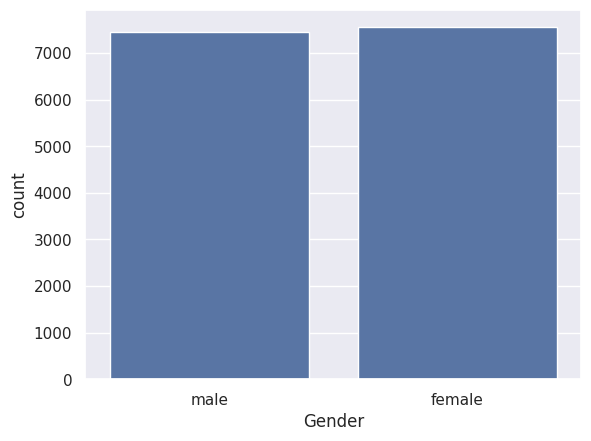

In [37]:
# ploting the gender column
sns.countplot(x='Gender',data=calories_data)

<ipython-input-38-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

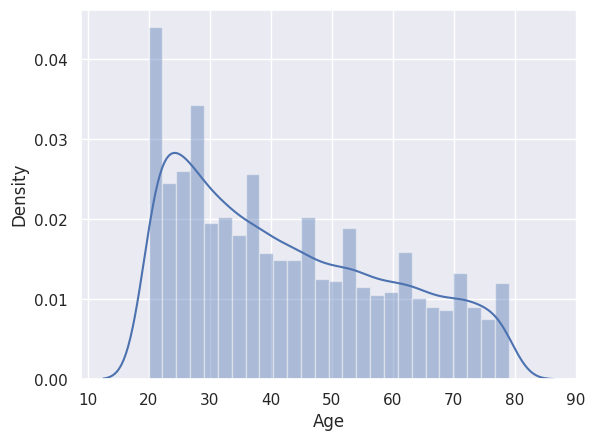

In [38]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-39-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

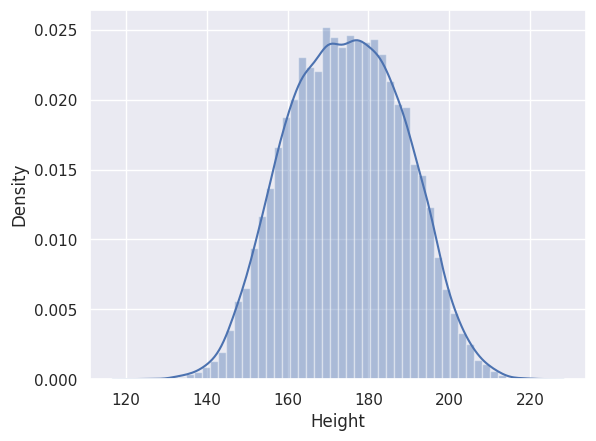

In [39]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-40-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

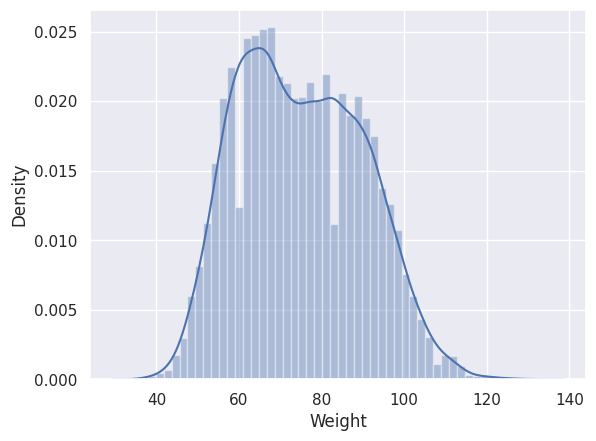

In [40]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

finding the correlation

1.   positive corr

2.   negative corr





In [43]:
correlation = calories_data.corr()

<ipython-input-43-65125daba8ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: >

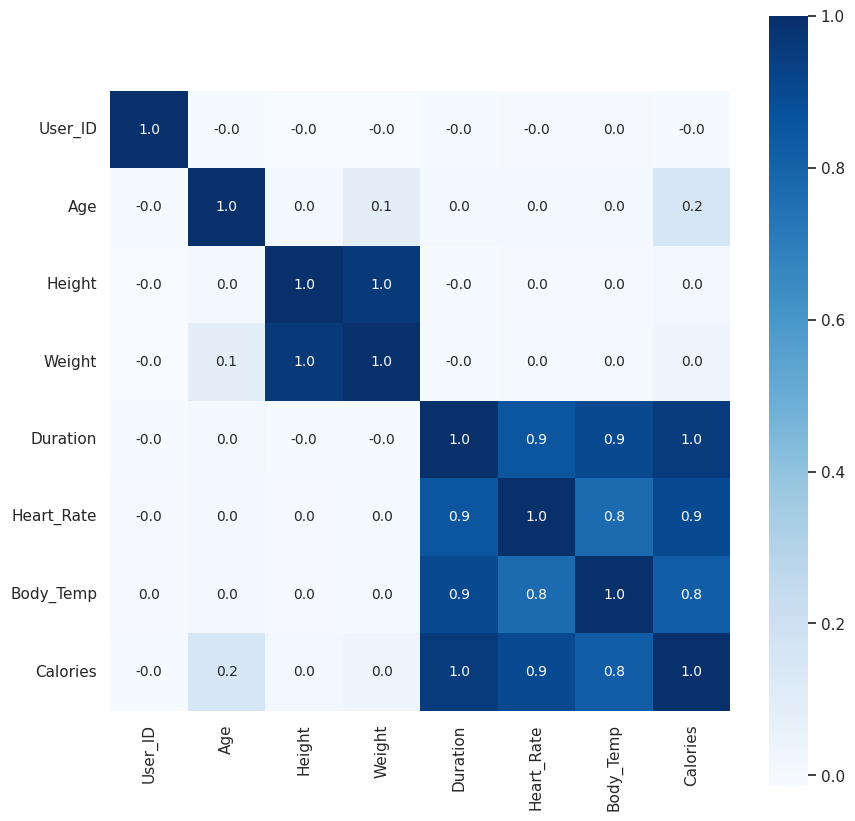

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

Converting the text data to numerical values

*   male --> 0
*   female --> 1



In [56]:
calories_data.replace({'Gender':{'male':0 , 'female':1}},inplace=True)

In [57]:
calories_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target



In [60]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']

In [61]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


Splitting the data into training data and Test data



In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [63]:
print(X.shape, X_train.shape, X_test.shape)


(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [64]:
model = XGBRegressor()

In [65]:
# training the model
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

model evaluation

In [66]:
test_data_prediction = model.predict(X_test)


In [67]:
print(test_data_prediction)


[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [68]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)


In [69]:
print("Mean Absolute Error = ", mae)


Mean Absolute Error =  1.4833678883314132
